In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/chicago-public-health-statistics/Dataset_Description_TEEN_Births.pdf
/kaggle/input/chicago-public-health-statistics/socrata_metadata_public-health-statistics-gonorrhea-cases-for-females-aged-15-44-in-chicago-by-year-2000-2014.json
/kaggle/input/chicago-public-health-statistics/socrata_metadata_public-health-statistics-general-fertility-rates-in-chicago-by-year-1999-2009.json
/kaggle/input/chicago-public-health-statistics/socrata_metadata_public-health-statistics-prenatal-care-in-chicago-by-year-1999-2009.json
/kaggle/input/chicago-public-health-statistics/public-health-statistics-gonorrhea-cases-for-females-aged-15-44-in-chicago-by-year-2000-2014.csv
/kaggle/input/chicago-public-health-statistics/public-health-statistics-chlamydia-cases-among-females-aged-15-44-in-chicago-by-year-2000-2014..csv
/kaggle/input/chicago-public-health-statistics/public-health-statistics-diabetes-hospitalizations-in-chicago-2000-2011.csv
/kaggle/input/chicago-public-health-statistics/public-hea

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.api import OLS

In [3]:
df = pd.read_csv("../input/chicago-public-health-statistics/public-health-statistics-selected-public-health-indicators-by-chicago-community-area.csv")
df.head(5)

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [4]:
df.dtypes

Community Area                                  int64
Community Area Name                            object
Birth Rate                                    float64
General Fertility Rate                        float64
Low Birth Weight                              float64
Prenatal Care Beginning in First Trimester    float64
Preterm Births                                float64
Teen Birth Rate                               float64
Assault (Homicide)                            float64
Breast cancer in females                      float64
Cancer (All Sites)                            float64
Colorectal Cancer                             float64
Diabetes-related                              float64
Firearm-related                               float64
Infant Mortality Rate                         float64
Lung Cancer                                   float64
Prostate Cancer in Males                      float64
Stroke (Cerebrovascular Disease)              float64
Childhood Blood Lead Level S

In [5]:
x = df[['Birth Rate',
       'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning',
       'Gonorrhea in Females', 'Tuberculosis',
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma']]
x.dtypes
x = x.fillna(x.mean())

In [6]:
y = df[['Unemployment']]
y = y.fillna(y.mean())

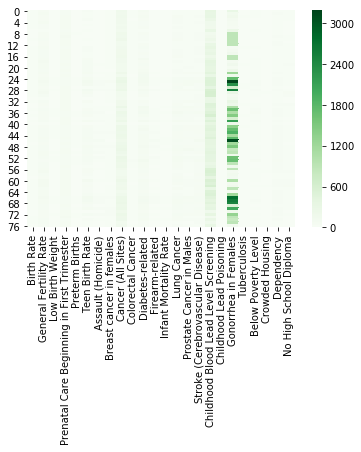

In [7]:
sns.heatmap(x, cmap="Greens")


In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [9]:
lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

In [10]:
print("Train score:")
print(lm.score(x_train, y_train))


Train score:
0.9409105627772755


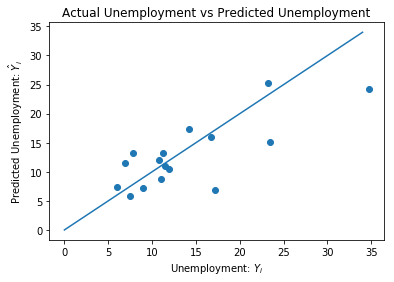

In [11]:
plt.scatter(y_test, y_predict)
plt.plot(range(35), range(35))

plt.xlabel("Unemployment: $Y_i$")
plt.ylabel("Predicted Unemployment: $\hat{Y}_i$")
plt.title("Actual Unemployment vs Predicted Unemployment")

plt.show()

In [12]:
# Make predictions
expected = y_train
predicted = model.predict(x_train)
# Summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print (model.intercept_, model.coef_, mse) 
print(model.score(x_train, y_train))

[0.52025721] [[ 0.15760361 -0.10722573  0.13407969  0.00308648 -0.12530306  0.04199812
   0.3300391   0.07641243 -0.04027806 -0.27243817 -0.00454211 -0.37713187
   0.2449973   0.20825248  0.00917521 -0.01815359 -0.00275405  0.51377487
   0.00121228 -0.16917247  0.15434959 -0.2626662   0.30053925  0.15245195]] Unemployment    2.783154
dtype: float64
0.9409105627772755
